<center>Учреждение образования</center>
<center>«Белорусский государственный университет информатики и радиоэлектроники»</center>
<br><br>
<center>Кафедра информатики</center>
<br><br><br><br><br><br><br><br><br><br>
<center>Лабораторная работа №1</center>
<center>Линейная регрессия</center>
<br><br><br><br><br><br><br><br>

<p style='text-align: right;'>
Выполнил:
Полевой Александр Вадимович <br>
магистрант кафедры информатики <br>      
группа № 858641	
<br><br><br><br>
Проверил:     Стержанов Максим Валерьевич
</p>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<center>
Минск 2019
</center>


Набор данных ex1data1.txt представляет собой текстовый файл, содержащий информацию о населении городов (первое число в строке) и прибыли ресторана, достигнутой в этом городе (второе число в строке). Отрицательное значение прибыли означает, что в данном городе ресторан терпит убытки.

**1.Загрузите набор данных ex1data1.txt из текстового файла.**

In [17]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

dataset = pandas.read_csv('data/ex1data1.txt', header=None, names=['population', 'revenue'])
dataset.head()

,population,revenue
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**2.Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.**

[Text(0, 0.5, 'revenue'), Text(0.5, 0, 'population')]

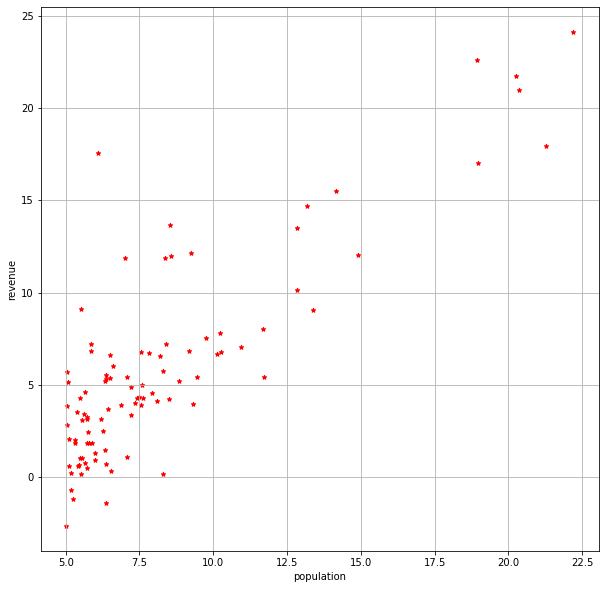

In [18]:
graph = dataset.plot(x='population', y='revenue', marker='*', kind='scatter', color='red', figsize=(10,10), grid=True)
graph.set(xlabel='population', ylabel='revenue')

**3.Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.**

In [19]:
def loss(theta, X, Y):
    sum = 0.0
    for i in range(len(Y)):
        sum += (theta[0] + theta[1] * X[i] - Y[i])**2
    return sum/(2*len(Y))

loss([0, 0], dataset['population'].values, dataset['revenue'].values)

32.072733877455654

**4.Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.**

In [22]:
X = dataset['population'].values
Y = dataset['revenue'].values

def h1(theta, x):
    return theta[0] + theta[1] * x

def der_theta(theta, X, Y, alpha, mode=0):
    m = len(Y)
    sum = 0
    for i in range(m):
        if mode == 0:
            sum += (h1(theta, X[i]) - Y[i])
        else:
            sum += (h1(theta, X[i]) - Y[i]) * X[i]
    return (alpha / m) * sum
    
def gradient_descent(X, Y, iterations = 200, alpha = 0.01, theta = [0, 0]):
    i = 0
    history = []
    
    cost = loss(theta, X, Y)
    history.append(np.array([cost, np.array(theta)]))
        
    for it_number in range(iterations):
        tmptheta = theta
        tmptheta[0] = theta[0] - der_theta(theta, X, Y, alpha)
        tmptheta[1] = theta[1] - der_theta(theta, X, Y, alpha, 1)
        
        cost = loss(theta, X, Y)
        history.append(np.array([cost, np.array(theta)]))
    
    return np.array(theta), cost, np.array(history)

theta, cost, history = gradient_descent(X, Y, 2000, 0.01, [0, 0])
print(f'Cost: {cost}')
print(f'Theta: {theta}')

Cost: 4.477967334939039
Theta: [-3.79118595  1.18254485]


Text(0, 0.5, 'cost function')

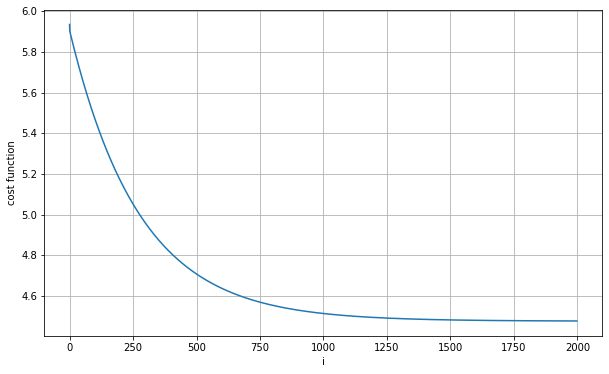

In [23]:
ch = history[:, 0]
ch = np.delete(ch, [0, 1])

plt.figure(figsize=(10,6))
plt.plot(range(ch.size), ch, '')
plt.grid(True)
plt.xlabel("i")
plt.ylabel("cost function")

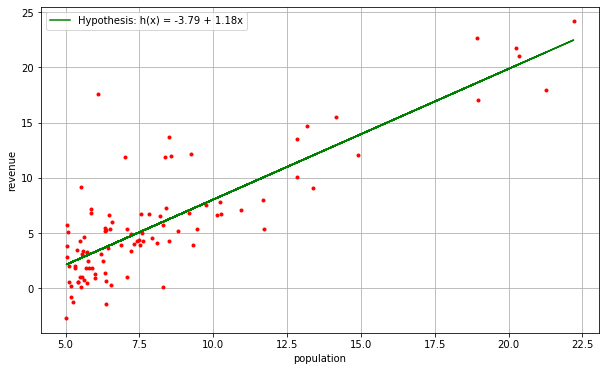

In [24]:
plt.figure(figsize=(10,6))
plt.plot(X, Y, '.', color='red')
plt.plot(X, theta[0] + theta[1] * X, 'b-', color='green', label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel('revenue')
plt.xlabel('population')
plt.legend()

**5.Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).**

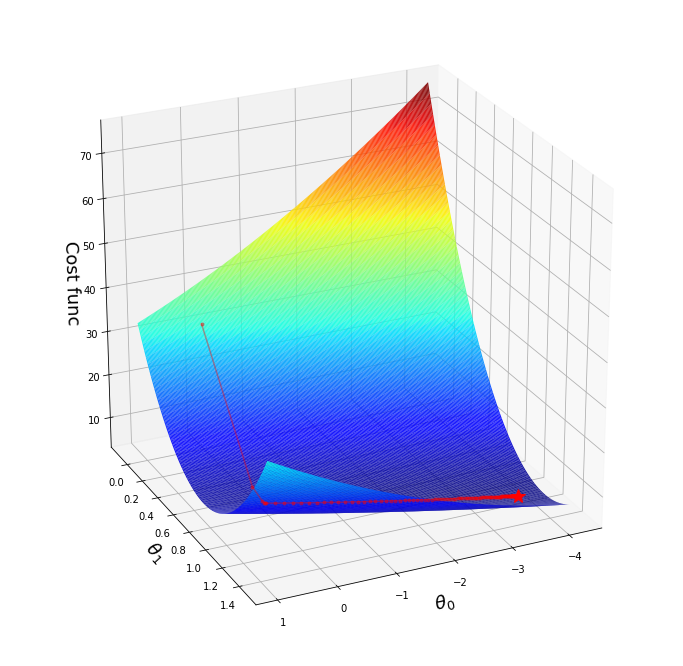

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

theta_ = theta.reshape(-1, 1)
x_3d = np.arange(-4.2, 1, 0.02)
y_3d = np.arange(-0.1, 1.5, 0.02)

plot_x, plot_y  = np.meshgrid(x_3d, y_3d)
plot_z = np.array([loss(np.array([plot_x[i], plot_y[i]]), X, Y) for i in range(len(plot_x))])

tmp_his = np.concatenate([history[0:5], history[5::20]])

graph_cost_history = np.vstack(tmp_his[:, 0]).astype(np.float).reshape(-1)

tmp = np.vstack(tmp_his[:, 1]).astype(np.float)

theha_0_history = tmp[:, 0].reshape(-1)
theha_1_history = tmp[:, 1].reshape(-1)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')


ax.plot_surface(plot_x, plot_y, plot_z,  rstride=1, cstride=1, linewidth=0, cmap = 'jet', edgecolor='none', alpha=.9)
ax.plot(*theta_, np.array([cost]), 'r*', markersize=14, zorder = 10)
ax.plot(theha_0_history, theha_1_history, graph_cost_history, marker = '.', color = 'r', alpha = .4, zorder = 9)

ax.set_xlabel(r'$\theta_0$', fontsize=18)
ax.set_ylabel(r'$\theta_1$', fontsize=18)
ax.set_zlabel('Cost func', fontsize=18)
ax.view_init(25, 65)

x_3d = np.arange(-4.2, 1, 0.02)
y_3d = np.arange(-0.1, 1.5, 0.02)

plot_x, plot_y  = np.meshgrid(x_3d, y_3d)

plot_z = np.array([loss(np.array([plot_x[i], plot_y[i]]), X, Y) for i in range(len(plot_x))])
plt.show()

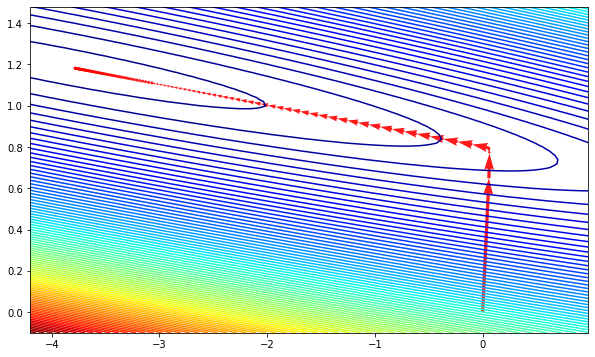

In [42]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
cnt = ax.contour(plot_x, plot_y, plot_z, 100, cmap = 'jet')

#Angles needed for quiver plot
anglesx = theha_0_history[1:] - theha_0_history[:-1]
anglesy = theha_1_history[1:] - theha_1_history[:-1]

ax.quiver(theha_0_history[:-1], theha_1_history[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

**6. Загрузите набор данных ex1data2.txt из текстового файла.**

In [43]:
original_df = pandas.read_csv('data/ex1data2.txt', header=None, names=['area', 'rooms', 'price'])
original_df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [44]:
Y = original_df['price'].values.astype('float64')
Y.shape

def gd_old(X, Y, iterations = 200, alpha = 0.01):
    
    features_count = X.shape[1]
    
    theta = np.zeros(features_count)
    
    def h(theta, x):
        sum = 0
        for i in range(len(theta)):
            sum += theta[i] * x[i]
        return sum
    
    def cost_f(theta, X, Y):
        m = len(Y)
        sum = 0
        for i in range(m):
            sum += (h(theta, X[i]) - Y[i])**2

        return sum/(2*m)
    
    def der_theta(theta, X, Y, alpha, theta_idx):
        m = len(Y)
        sum = 0
        for i in range(m):
            sum += (h(theta, X[i]) - Y[i]) * X[i][theta_idx]
    
        return (alpha / m) * sum
    
    
    ## GD algorithm
    theta_history = np.zeros([iterations + 1, features_count])
    cost_history = np.zeros(iterations + 1) # .reshape(1, -1) if required
    
    cost = cost_f(theta, X, Y)

    cost_history[0] = cost
    theta_history[0] = theta
    
    for it_idx in range(iterations):
        tmptheta = np.copy(theta)
        
        for theta_idx in range(features_count):
            tmptheta[theta_idx] = theta[theta_idx] - der_theta(theta, X, Y, alpha, theta_idx)
        
        theta = np.copy(tmptheta)
        
        cost = cost_f(theta, X, Y)
        
        cost_history[it_idx + 1] = cost
        theta_history[it_idx + 1] = theta
    
    return theta, cost, theta_history, cost_history

de_normalized_df = original_df.drop('price', axis=1)
de_normalized_df.head()



,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [45]:
X_denorm = de_normalized_df.copy()
X_denorm.insert(0, '', 1)
X_denorm = X_denorm.values.astype('float64')

X_denorm[0: 2]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00]])

**7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.**

In [46]:
normalized_df = (de_normalized_df-de_normalized_df.mean())/(de_normalized_df.max()-de_normalized_df.min())
normalized_df.head()

,area,rooms
0,0.028494,-0.042553
1,-0.110502,-0.042553
2,0.110127,-0.042553
3,-0.161247,-0.292553
4,0.275598,0.207447


In [47]:
X_norm = normalized_df.copy()
X_norm.insert(0, '', 1)
X_norm = X_norm.values.astype('float64')

X_norm[0: 2]

array([[ 1.        ,  0.02849397, -0.04255319],
       [ 1.        , -0.11050217, -0.04255319]])

In [48]:
theta, cost, _, norm_cost_history = gd_old(X_norm, Y)
print(f'Cost: {cost}')
print(f'Theta: {theta}')

Cost: 7571592939.046129
Theta: [294804.28212715  43355.1309382   18903.11447294]


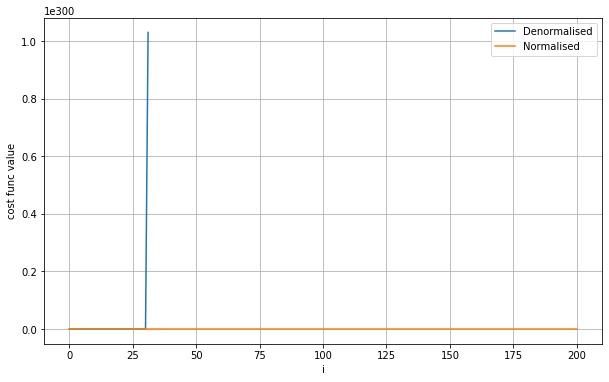

In [50]:
plt.figure(figsize=(10,6))

plt.plot(range(len(denorm_cost_history)), denorm_cost_history, label='Denormalised')
plt.plot(range(len(norm_cost_history)), norm_cost_history, label='Normalised')

plt.grid(True)
plt.xlabel("i")
plt.ylabel("cost func value")
plt.legend()

**8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.**

In [51]:
def h(theta, x):
    return np.dot(x, theta.T)

def cost_f(theta, X, Y):
    m = len(Y)
    results = h(theta, X) - Y
    return (np.dot(results.T, results) / (2*m)).item()

def gd_vec(X, Y_un_resh, iterations = 200, alpha = 0.01):
    Y = Y_un_resh.reshape(-1, 1)
    
    features_count = X.shape[1]
    m = Y.size
    
    theta = np.zeros([1, features_count])    
    
    theta_history = np.zeros([iterations + 1, features_count])
    cost_history = np.zeros(iterations + 1)
    
    cost = cost_f(theta, X, Y)

    cost_history[0] = cost
    theta_history[0] = theta
    
    for it_idx in range(iterations):
        dt = np.dot((h(theta, X) - Y).T, X)
        theta = theta - (alpha / m) * dt
        
        cost = cost_f(theta, X, Y)
        
        cost_history[it_idx + 1] = cost
        theta_history[it_idx + 1] = theta
    
    return theta, cost, theta_history, cost_history

theta, cost, theta_history, cost_history = gd_old(X_norm, Y)

print(f'Cost: {cost}')
print(f'Theta: {theta}')

theta, cost, theta_history, cost_history = gd_vec(X_norm, Y)

print(f'Cost: {cost}')
print(f'Theta: {theta}')

Cost: 7571592939.046129
Theta: [294804.28212715  43355.1309382   18903.11447294]
Cost: 7571592939.046129
Theta: [[294804.28212715  43355.1309382   18903.11447294]]


**9. Покажите, что векторизация дает прирост производительности.**

In [52]:
%time
theta, _, _, _ = gd_old(X_norm, Y, 9000, 0.1)
print(theta)

%time
theta, _, _, _ = gd_vec(X_norm, Y, 9000, 0.1)
print(theta)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
[340412.65957447 504777.87802321 -34952.04307876]
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
[[340412.65957447 504777.87802321 -34952.04307876]]


**10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.**

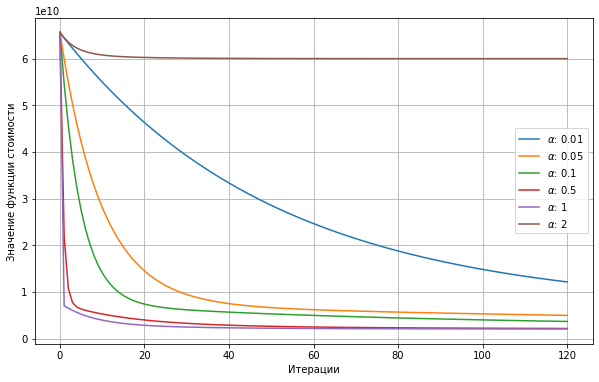

In [53]:
loss = {}
iterations_count = 120

for alpha in [0.01, 0.05, 0.1, 0.5, 1, 2]:
    _, _, _, cost_history = gd_vec(X_norm, Y, iterations_count, alpha)
    loss[str(alpha)] = cost_history
    
plt.figure(figsize=(10,6))

iter_range = range(iterations_count + 1)

for alpha, cost_series in loss.items():
    plt.plot(iter_range, cost_series, label=r'$ \alpha $: %s'%(alpha))

plt.grid(True)
plt.xlabel("Итерации")
plt.ylabel("Значение функции стоимости")
plt.legend()

**11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.**

In [54]:
def normal_equation(X, Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

%time
normal_equation(X_norm, Y)

%time
theta, _, _, _ = gd_vec(X_norm, Y, 9000, 0.1)

print(theta)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
CPU times: user 10 µs, sys: 3 µs, total: 13 µs
Wall time: 9.06 µs
[[340412.65957447 504777.87802321 -34952.04307876]]


**Вывод** 

Линейная регрессия - модель зависимости переменной Х от одной или нескольких других переменных с линейной функцией зависимости

Линейная регрессия относится к нзадаче определения "линии наилучшего соответствия" через набор точек данных и стала предшественником нелинейных методов используемых для обучения нейронных сетей. 

Цель линейной регрессии - поиск линии, наиболее соответствующей этим точкам. 